## Assignment ONE

### Econia Racheal - B26253 - J24M19/016
#### Data Analysis and Visualization
#### Ms. Immaculate Kamusiime

## About the iris Dataset

**Description**

The dataset contains measurements of four features (variables) for 150 iris flowers from three different species (classes).

Variable definitions

* **Sepal Length (cm)**: The length of the sepal of the flower.
* **Sepal Width (cm)**: The width of the sepal of the flower.
* **Petal Length (cm)**: The length of the petal of the flower.
* **Petal Width (cm)**: The width of the petal of the flower.
* **Species:** The species of the iris flower which is the target class

### **Starter Notebook**

###### You can accomplish this exercise in Colab, Vscode, Jupyter notebook, etc.

Installing and importing the necesary libraries

In [4]:
# INSTALLING LIBRARIES FOR THE FIRST TIME
!pip install pandas
!pip install numpy

In [5]:
# After installation, then import the libraries of the installed packages
import pandas as pd
import numpy as numpy

IMPORTING DATASETS

In [39]:
# more libraries are needed to be able to plot and perform other activities
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot as qq_plot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [15]:
# Reading the data into a DataFrame
Iris = pd.read_csv('iris.csv')

In [16]:
# Displaying the first few rows of the DataFrame
Iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# Overview of data shape and composition at a high level
Iris.shape

(150, 5)

##**Instructions**

1. Check for any missing values in the iris dataset. Report your findings. (1 mark)

2. Explore and visually inspect the data distribution for each of the variables to understand its structure and relationships between variables. Discuss any patterns or anomalies you observe. (2 marks)

3. Create Q-Q plots for Sepal.Length, Sepal.Width, Petal.Length, and Petal.Width. Do these variables follow a normal distribution? (2 marks)

4. Check and identify any outliers in the variables. Explain your findings. (1 marks)


5. Generate Descriptive Statistics of the variables and discuss your findings. (2 marks)

6. Perform the Shapiro-Wilk test for normality on each of the quantitative variables. Interpret the results and make a conclusion. (2 marks)

7. Calculate the Pearson correlation coefficients between Sepal.Length, Sepal.Width, Petal.Length, and Petal.Width. Create a correlation matrix and interpret the relationships. (4 marks)

8. Conduct a one-way ANOVA to test if there are significant differences in Sepal.Length among the three species of iris. Interpret the results. (4 marks)

9. Perform post-hoc tests to determine which pairs of species differ significantly in Sepal.Length. (2 marks)


**Good luck**

In [18]:
# Identifying dataset variables and their exact namings
Iris.columns.values

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'], dtype=object)

#### General overview of the size and composition of the DataFrame

In [19]:
# General overview of the size and composition of the DataFrame
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
# Summary statistics of the dataset
Iris.describe(include = 'all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


1. Check for any missing values in the iris dataset. Report your findings

In [22]:
# Checking for missing values in the dataset
Iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

**The dataset has no missing values**

2. Explore and visually inspect the data distribution for each of the variables to understand its structure and relationships between variables. Discuss any patterns or anomalies you observe.


Visualizing the data distribution:


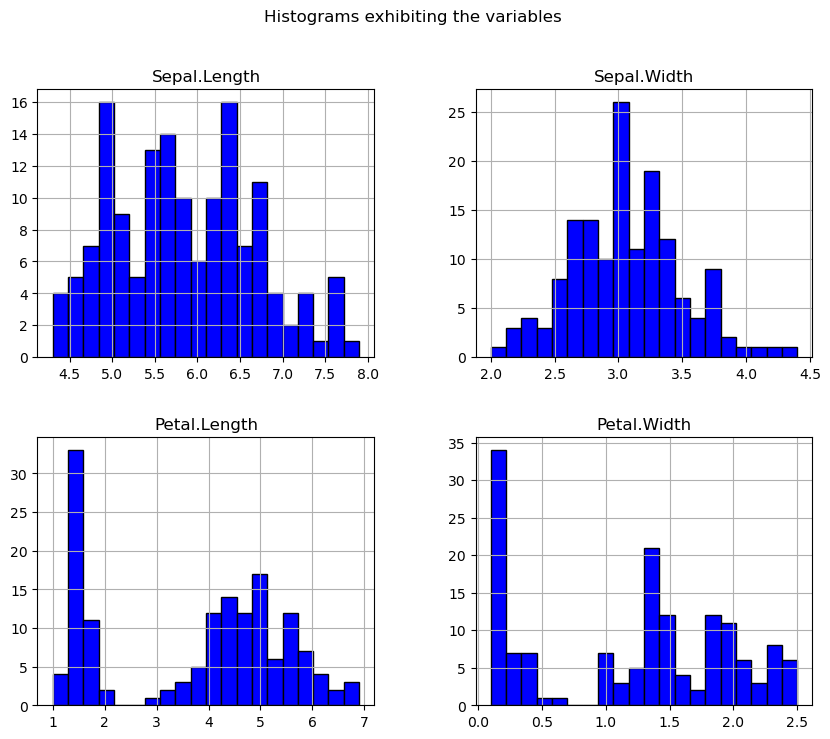

In [27]:
# Print a statement indicating the start of data visualization
print("\nVisualizing the data distribution:")

# Generate histograms for each variable in the Iris dataset
Iris.hist(figsize=(10, 8), bins=20, color='blue', edgecolor='black')

# Set the main title for the histograms
plt.suptitle('Histograms exhibiting the variables')

# Display the histograms
plt.show()

**Looking at the histograme above, it shows that the data is not normally distributed.**

3. Create Q-Q plots for Sepal.Length, Sepal.Width, Petal.Length, and Petal.Width. Do these variables follow a normal distribution?


Creating Q-Q plots:


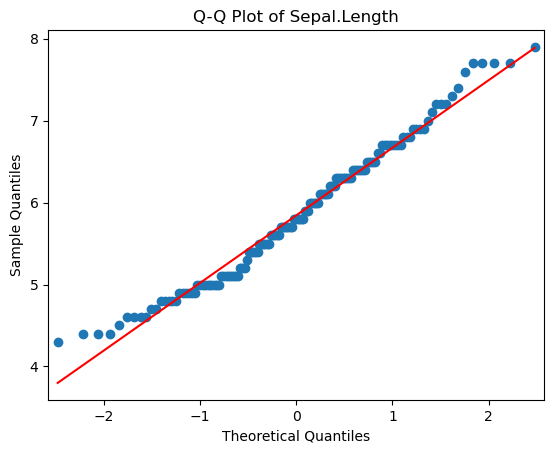

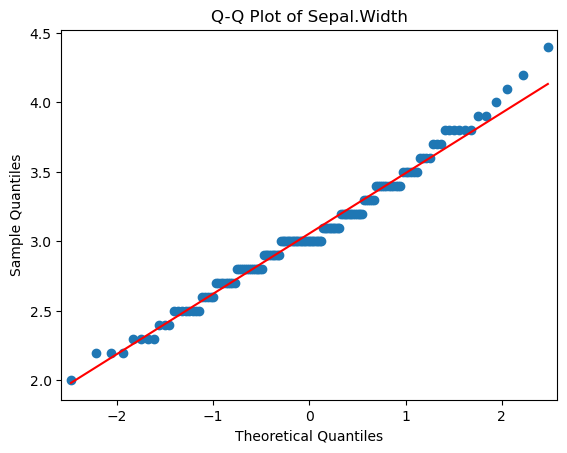

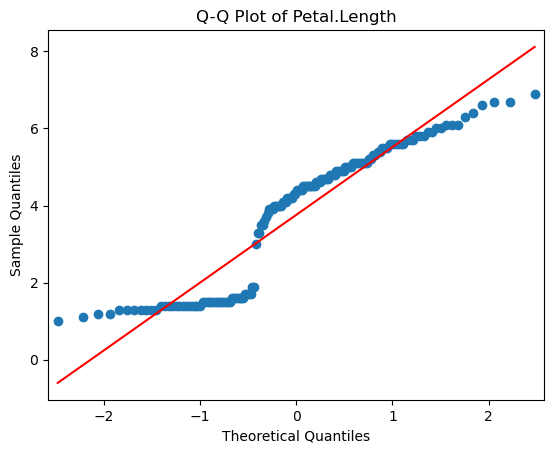

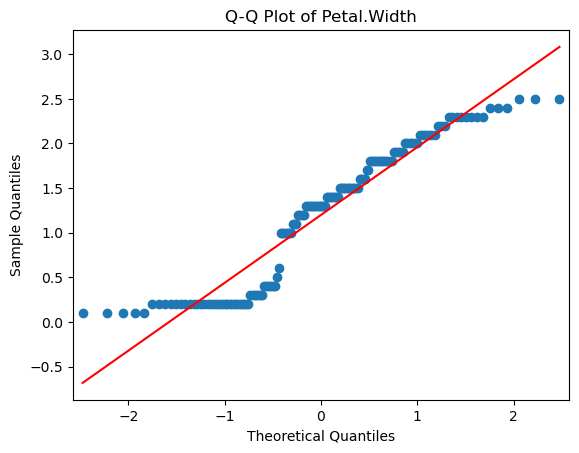

In [26]:
# 3. Create Q-Q plots for Sepal.Length, Sepal.Width, Petal.Length, and Petal.Width
print("\nCreating Q-Q plots:")
variables = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
for var in variables:
    qqplot(Iris[var], line='s')
    plt.title(f'Q-Q Plot of {var}')
    plt.show()

**The data points on all the graphs deviate significantly from the line especially on the tail, this shows that the data is not normally distributed.**

4. Check and identify any outliers in the variables. Explain your findings.

### Checking outliers using a box plot


Identifying outliers with boxplots:


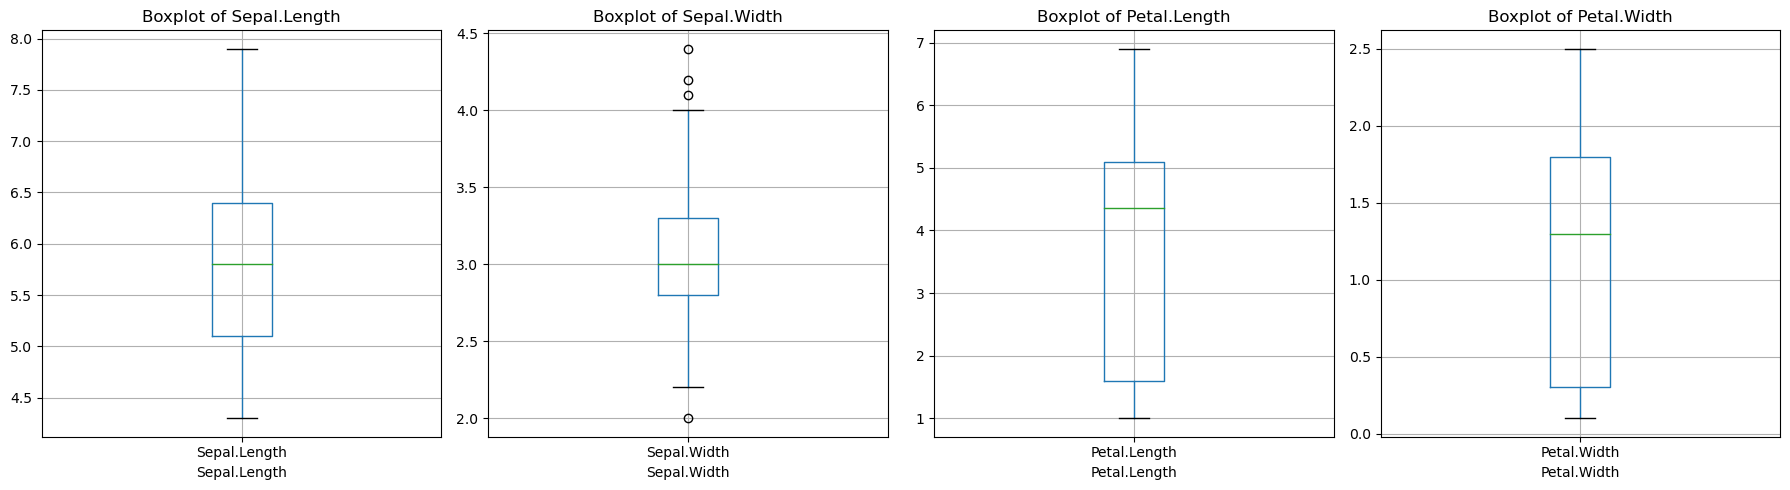

In [29]:
# Using Boxplots to check for outliers
print("\nIdentifying outliers with boxplots:")

# Create subplots for each variable
Iris_variables = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
fig, axes = plt.subplots(nrows=1, ncols=len(Iris_variables), figsize=(18, 5))

# Generate boxplots for each specified column of the Iris dataset
for var, ax in zip(Iris_variables, axes):
    Iris.boxplot(column=var, ax=ax)
    ax.set_title(f'Boxplot of {var}')
    ax.set_xlabel(var)

# Adjust layout
plt.tight_layout()

# Display the boxplots
plt.show()


**Sepal.length, petal.length, and petal.width donot have outliers except for sepal.width which shows outliers clearly seen from the 3 dots outside the box and one dot below.**

In [30]:
from scipy.stats import shapiro

#### Check for normality using Shapiro-Wilk test
print("\nChecking for normality...")

### Iterate over the columns (excluding the last column, which is assumed to be the target variable)
for col in Iris.columns[:-1]:
    # Perform the Shapiro-Wilk test on the current column
    stat, p = shapiro(Iris[col])
    
    # Print the test results
    print(f"Shapiro-Wilk test for {col}: stat={stat:.2f}, p={p:.2f}")
    
    # Check if the p-value is greater than the significance level (0.05)
    if p > 0.05:
        print(f"{col} follows a normal distribution (fail to reject H0)")
    else:
        print(f"{col} does not follow a normal distribution (reject H0)")



Checking for normality...
Shapiro-Wilk test for Sepal.Length: stat=0.98, p=0.01
Sepal.Length does not follow a normal distribution (reject H0)
Shapiro-Wilk test for Sepal.Width: stat=0.98, p=0.10
Sepal.Width follows a normal distribution (fail to reject H0)
Shapiro-Wilk test for Petal.Length: stat=0.88, p=0.00
Petal.Length does not follow a normal distribution (reject H0)
Shapiro-Wilk test for Petal.Width: stat=0.90, p=0.00
Petal.Width does not follow a normal distribution (reject H0)


5. Generate Descriptive Statistics of the variables and discuss your findings.

In [31]:
# Summary statistics of the dataset
Iris.describe(include = 'all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


6. Perform the Shapiro-Wilk test for normality on each of the quantitative variables. Interpret the results and make a conclusion.

In [32]:
# List of quantitative variables
quantitative_variables = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Perform the Shapiro-Wilk test for normality on each quantitative variable
shapiro_results = {}
for var in quantitative_variables:
    stat, p_value = shapiro(Iris[var])
    shapiro_results[var] = {'statistic': stat, 'p_value': p_value}

print("\nShapiro-Wilk Test for Normality Results:")
for var, results in shapiro_results.items():
    print(f"\nVariable: {var}")
    print(f"Statistic: {results['statistic']:.4f}, P-value: {results['p_value']:.4f}")
    if results['p_value'] > 0.05:
        print(f"Conclusion: The data for {var} appears to be normally distributed (fail to reject H0).")
    else:
        print(f"Conclusion: The data for {var} does not appear to be normally distributed (reject H0).")


Shapiro-Wilk Test for Normality Results:

Variable: Sepal.Length
Statistic: 0.9761, P-value: 0.0102
Conclusion: The data for Sepal.Length does not appear to be normally distributed (reject H0).

Variable: Sepal.Width
Statistic: 0.9849, P-value: 0.1011
Conclusion: The data for Sepal.Width appears to be normally distributed (fail to reject H0).

Variable: Petal.Length
Statistic: 0.8763, P-value: 0.0000
Conclusion: The data for Petal.Length does not appear to be normally distributed (reject H0).

Variable: Petal.Width
Statistic: 0.9018, P-value: 0.0000
Conclusion: The data for Petal.Width does not appear to be normally distributed (reject H0).


**Shapiro-Wilk Test: This test checks the null hypothesis that the data was drawn from a normal distribution. P-values of Sepal.Length, Petal.Length, and Petal.Width are less than 0.05 therefore i reject the hypothesis meaning they are not normally distributed. The P-value of Sepal.Width is greater than 0.05 meaning it is normally distributed.**

In [33]:

# Select the columns of interest
quantitative_variables = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Calculate the Pearson correlation coefficients
correlation_matrix = Iris[quantitative_variables].corr(method='pearson')

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000


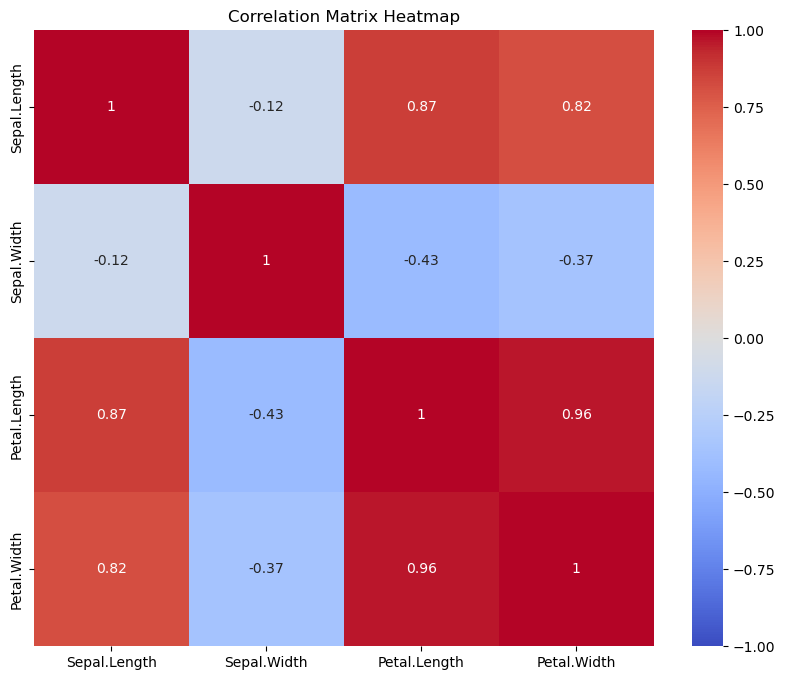

In [35]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Sepal.Length and Sepal.Width: There is a very weak negative correlation (-0.118).
Sepal.Length and Petal.Length: There is a strong positive correlation (0.872).
Sepal.Length and Petal.Width: There is a strong positive correlation (0.818).
Sepal.Width and Petal.Length: There is a moderate negative correlation (-0.428).
Sepal.Width and Petal.Width: There is a moderate negative correlation (-0.366).
Petal.Length and Petal.Width: There is a very strong positive correlation (0.963).
These connections can aid in grasping the interrelationships among variables within the Iris dataset. For instance, the robust positive correlation observed between Petal.Length and Petal.Width indicates that as the length of the petal increases, its width also typically increases.**

8. Conduct a one-way ANOVA to test if there are significant differences in Sepal.Length among the three species of iris. Interpret the results.

In [36]:
#Conduct a one-way ANOVA to test if there are significant differences in Sepal.Length among the three species of iris. Interpret the results.

# Ensure the column names are as expected
Iris.columns = Iris.columns.str.replace('.', '_')

species_groups = Iris.groupby('Species')['Sepal_Length'].apply(list)

# Perform the one-way ANOVA
anova_result = stats.f_oneway(*species_groups)

print("ANOVA results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

alpha = 0.05
if anova_result.pvalue < alpha:
    print("There is a significant difference in Sepal.Length among the three species of iris.")
else:
    print("There is no significant difference in Sepal.Length among the three species of iris.")


ANOVA results:
F-statistic: 119.26450218450468
P-value: 1.6696691907693826e-31
There is a significant difference in Sepal.Length among the three species of iris.


**Given that the p-value (1.67e-31) is significantly smaller than 0.05, we reject the null hypothesis. Hence, we conclude that there exists a significant difference in Sepal.Length among the three species of iris.**

9. Perform post-hoc tests to determine which pairs of species differ significantly in Sepal.Length. 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


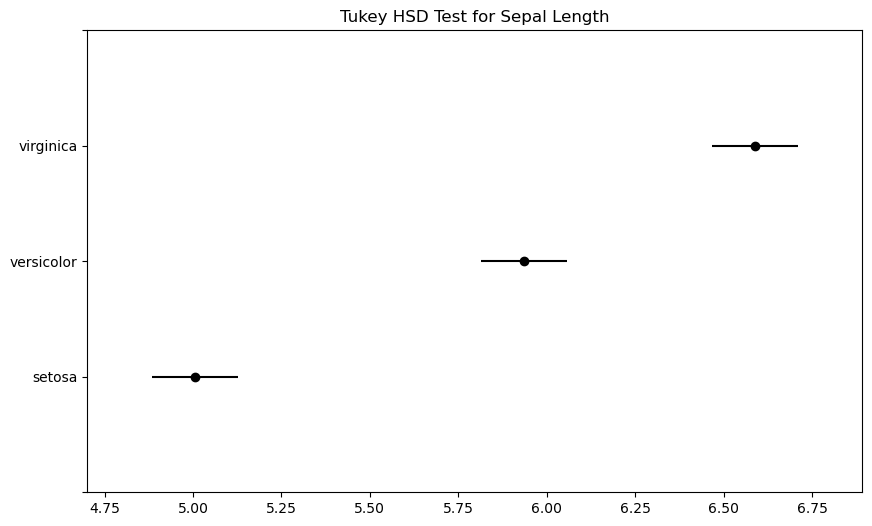

In [41]:
# Ensure the column names are as expected
Iris.columns = Iris.columns.str.replace('.', '_')

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=Iris['Sepal_Length'], groups=Iris['Species'], alpha=0.05)


print(tukey_result)

tukey_result.plot_simultaneous()
plt.title('Tukey HSD Test for Sepal Length')
plt.show()


**The results of the Tukey HSD test reveal significant differences in Sepal.Length between all pairs of species (setosa vs versicolor, setosa vs virginica, and versicolor vs virginica) in the dataset. The p-values for all comparisons are extremely small (0.0), leading us to reject the null hypothesis for each pair. This indicates that the mean Sepal.Length differs significantly across all pairs of species.**